In [1]:
import numpy as np
from scipy import optimize as op
import matplotlib.pyplot as plt

import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")

import math

In [2]:
from uilc.methods import esc, bc
from uilc import PositionArray

In [3]:
s= 4
W = 0.5
H = 0.3
source = bc.fill_rq(
    s, W, H, 
    method = "esc", 
    thershold=0.35, diff_thers=True
    )
xe = bc.get_xe(s, W, H)
xm = bc.get_xm(s, W, H, xe)

In [4]:
bc.search_rq_fill_numbers(s, W, H, method="esc")

(2, 0)

In [5]:
x = np.linspace(0, W/2, 200)
y = np.abs(bc._Di_f(x, s, 1, W, H))
y = y/y.max()

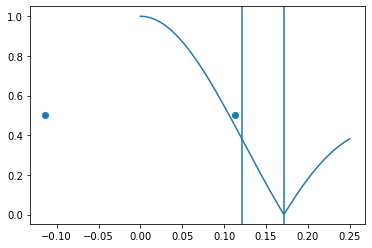

In [6]:
plt.plot(x, y)
plt.axvline(x=xe)
plt.axvline(x=xm)
plt.scatter(source, 0.5*np.ones(shape=(len(source),)))

In [7]:
d = source[1]-source[0]
pos_arr = bc.get_positive(source)

In [8]:
arr_pq, arr_r = bc._get_r_points(pos_arr, d, s, W, H, xe, xm)

In [9]:
arr_pq

PositionArray([0.11338934])

In [10]:
arr_r

array([0.25])

In [11]:
bc._r_region_x(0.11338934, s, W, H, xe, xm)

0.25

In [12]:
arr_pos = np.concatenate([arr_pq ,arr_r], axis=0) 

In [13]:
x_arr = bc.get_full_arr(arr_pos, arr_type=0)

In [14]:
x_arr

array([-0.11338934, -0.25      ,  0.11338934,  0.25      ])

In [15]:
arr =PositionArray.from_arrays(x_arr , x_arr )

In [16]:
import uilc.utils.misc as misc
from uilc import radiation

In [17]:
X, Y = misc.plane_meshgrid([-W/2, W/2], [-W/2 ,W/2], [200, 200])
lamber = lambda d: radiation.lambertian(s, H, d)
Z = arr.intensity_on((X,Y), lamber)

In [18]:
x_plot = X[0]
y_plot = Z[0]


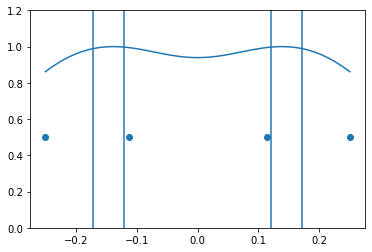

In [19]:
fig =plt.figure()
ax = fig.add_subplot()
ax.plot(x_plot, y_plot/y_plot.max())
ax.scatter(x_arr, 0.5*np.ones(shape=(len(x_arr))))
ax.set_ylim([0, 1.2])
for x in [-xe, -xm, xm, xe]:
    ax.axvline(x)

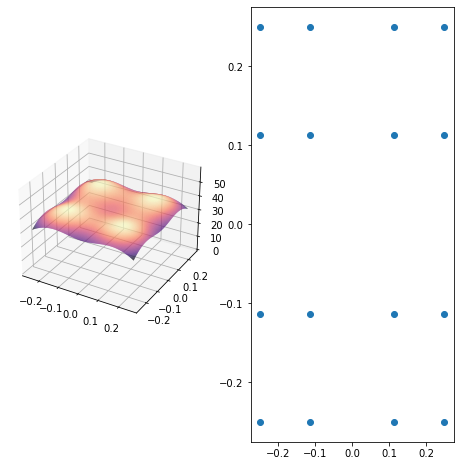

In [20]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot_surface(X, Y, Z, rstride= 1, cstride =1, cmap='magma', edgecolor='none')
ax1.set_zlim([0, Z.max()*1.4])
ax2.scatter(*arr.to_meshgrid())
plt.show()